# Quick Covid-19 contamination test thanks to AI based on X Ray image classification using CNN algorithme

In [1]:
import keras
from keras.utils import to_categorical
from keras.datasets import mnist
from keras.models import Sequential
from keras.layers import Dense, Dropout, Flatten
from keras.layers import Conv2D, MaxPooling2D
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import os
import glob
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, confusion_matrix
import warnings
from keras.preprocessing.image import ImageDataGenerator
warnings.filterwarnings('ignore')

Using TensorFlow backend.


In [4]:
from PIL import Image
import os, sys

path = "xray_dataset_covid19/train/NORMAL/"
dirs = os.listdir( path )

def resize():
    for item in dirs:
        if os.path.isfile(path+item):
            im = Image.open(path+item)
            f, e = os.path.splitext(path+item)
            imResize = im.resize((200,200), Image.ANTIALIAS)
            if( (item.split('.')[1] == 'jpg') or (item.split('.')[1] == 'jpeg') ):
                imResize.save('xray_dataset_covid19/resizedNormal/' + item + 'Resized.jpg', 'JPEG', quality=90)
            else:
                imResize.save('xray_dataset_covid19/resizedNormal/' + item + 'Resized.png', 'PNG', quality=90)
resize()

In [5]:
path = "xray_dataset_covid19/test/NORMAL/"
dirs = os.listdir( path )

def resize():
    for item in dirs:
        if os.path.isfile(path+item):
            im = Image.open(path+item)
            f, e = os.path.splitext(path+item)
            imResize = im.resize((200,200), Image.ANTIALIAS)
            if( (item.split('.')[1] == 'jpg') or (item.split('.')[1] == 'jpeg') ):
                imResize.save('xray_dataset_covid19/resizedNormal/' + item + 'Resized.jpg', 'JPEG', quality=90)
            else:
                imResize.save('xray_dataset_covid19/resizedNormal/' + item + 'Resized.png', 'PNG', quality=90)
resize()

In [6]:
path = "xray_dataset_covid19/train/PNEUMONIA/"
dirs = os.listdir( path )

def resize():
    for item in dirs:
        if os.path.isfile(path+item):
            im = Image.open(path+item)
            f, e = os.path.splitext(path+item)
            imResize = im.resize((200,200), Image.ANTIALIAS)
            if( (item.split('.')[1] == 'jpg') or (item.split('.')[1] == 'jpeg') ):
                imResize.save('xray_dataset_covid19/resizedPneumonia/' + item + 'Resized.jpg', 'JPEG', quality=90)
            else:
                imResize.save('xray_dataset_covid19/resizedPneumonia/' + item + 'Resized.png', 'PNG', quality=90)
resize()

In [7]:
path = "xray_dataset_covid19/test/PNEUMONIA/"
dirs = os.listdir( path )

def resize():
    for item in dirs:
        if os.path.isfile(path+item):
            im = Image.open(path+item)
            f, e = os.path.splitext(path+item)
            imResize = im.resize((200,200), Image.ANTIALIAS)
            if( (item.split('.')[1] == 'jpg') or (item.split('.')[1] == 'jpeg') ):
                imResize.save('xray_dataset_covid19/resizedPneumonia/' + item + 'Resized.jpg', 'JPEG', quality=90)
            else:
                imResize.save('xray_dataset_covid19/resizedPneumonia/' + item + 'Resized.png', 'PNG', quality=90)
resize()

In [2]:
filenames = glob.glob("./xray_dataset_covid19/*/*.*")
start = "./xray_dataset_covid19"
relative_paths=[]
categories = []
for filename in filenames:
    rp = os.path.relpath(filename, start)
    relative_path = rp.split('/')[0][7:] # + ' ' + rp.split('\\')[1] 
    relative_paths.append(relative_path)
    
df = pd.DataFrame({
    'image': filenames,
    'label': relative_paths
})
df.head()

image      label
0  ./xray_dataset_covid19/resizedPneumonia/7EF28E...  Pneumonia
1  ./xray_dataset_covid19/resizedPneumonia/1-s2.0...  Pneumonia
2  ./xray_dataset_covid19/resizedPneumonia/446B2C...  Pneumonia
3  ./xray_dataset_covid19/resizedPneumonia/B59DD1...  Pneumonia
4  ./xray_dataset_covid19/resizedPneumonia/F051E0...  Pneumonia

In [3]:
df.tail()

image   label
183  ./xray_dataset_covid19/resizedNormal/IM-0006-0...  Normal
184  ./xray_dataset_covid19/resizedNormal/IM-0069-0...  Normal
185  ./xray_dataset_covid19/resizedNormal/NORMAL2-I...  Normal
186  ./xray_dataset_covid19/resizedNormal/IM-0009-0...  Normal
187  ./xray_dataset_covid19/resizedNormal/NORMAL2-I...  Normal

In [4]:
df.label.unique()

array(['Pneumonia', 'Normal'], dtype=object)

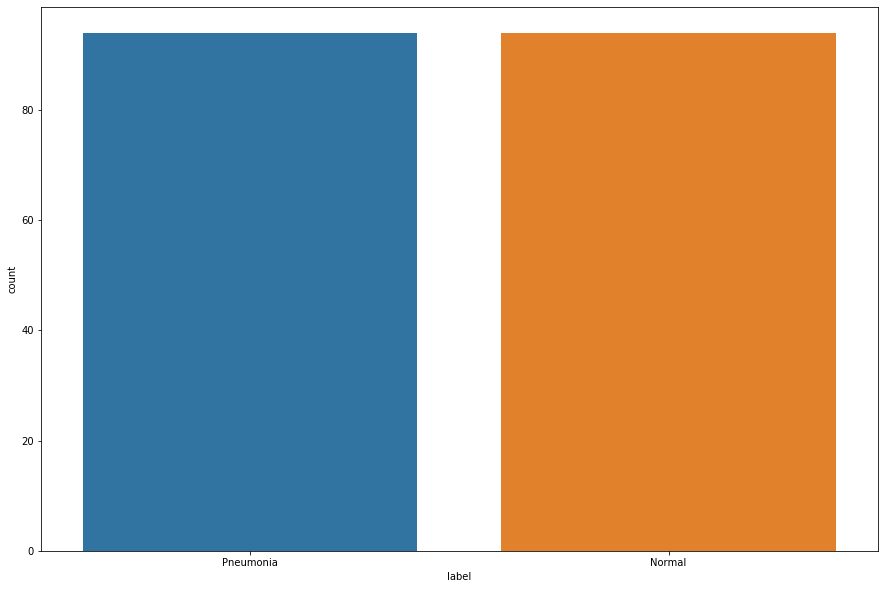

In [5]:
plt.figure(figsize=(15,10))
sns.countplot(df.label)
plt.show()

In [6]:
datagentrain = ImageDataGenerator(featurewise_center=True, featurewise_std_normalization=True,rescale=1./255)
datagentest = ImageDataGenerator(featurewise_center=True, featurewise_std_normalization=True,rescale=1./255)

In [7]:
datagentrain.mean = np.array([127.5, 127.5, 127.5], dtype=np.float32).reshape((1,1,3))
datagentrain.std = 255.0
datagentest.mean = np.array([127.5, 127.5, 127.5], dtype=np.float32).reshape((1,1,3))
datagentest.std = 255.0

In [8]:
datagentrain = ImageDataGenerator(featurewise_center=True, featurewise_std_normalization=True,
                                  brightness_range=[0.1,1.0]
                                 )
datagentest = ImageDataGenerator(featurewise_center=True, featurewise_std_normalization=True)
datagentrain.mean = np.array([127.5, 127.5, 127.5], dtype=np.float32).reshape((1,1,3))
datagentrain.std = 255.0
datagentest.mean = np.array([127.5, 127.5, 127.5], dtype=np.float32).reshape((1,1,3))
datagentest.std = 255.0

In [9]:
from sklearn.model_selection import train_test_split
train_df, test_df = train_test_split(df,test_size = 0.2, stratify=df.label)

In [10]:
traingenerator = datagentrain.flow_from_dataframe( train_df , './',x_col = 'image' , y_col = 'label', target_size = (200,200) 
                                                  ,class_mode='binary', batch_size = 64)
testgenerator = datagentest.flow_from_dataframe( test_df , './',x_col = 'image' , y_col = 'label', target_size = (200,200) 
                                                ,class_mode='binary', batch_size = 64)

Found 150 validated image filenames belonging to 2 classes.
Found 38 validated image filenames belonging to 2 classes.


In [11]:
df.label.nunique()

2

In [11]:
model = Sequential()

model.add(Conv2D(32, (3,3), activation='relu', input_shape=(200, 200, 3)))
model.add(MaxPooling2D(pool_size=(2, 2)))

model.add(Conv2D(64, (3,3), activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))

model.add(Conv2D(128, (3,3), activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))

model.add(Conv2D(256, (3,3), activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))

model.add(Conv2D(512, (3,3), activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))

model.add(Flatten())
model.add(Dense(512, activation='relu'))
model.add(Dense(1, activation='sigmoid')) 
model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])
model.summary()

Instructions for updating:
Colocations handled automatically by placer.
Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_1 (Conv2D)            (None, 198, 198, 32)      896       
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 99, 99, 32)        0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 97, 97, 64)        18496     
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 48, 48, 64)        0         
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 46, 46, 128)       73856     
_________________________________________________________________
max_pooling2d_3 (MaxPooling2 (None, 23, 23, 128)       0         
________________________________________________

In [14]:
history = model.fit_generator(
    traingenerator, 
    epochs=3,
    validation_data = testgenerator,
    validation_steps= len(testgenerator),
    steps_per_epoch = len(traingenerator)
)

Instructions for updating:
Use tf.cast instead.
Epoch 1/3
3/3 [==============================] - 12s 4s/step - loss: 1.0587 - accuracy: 0.4600 - val_loss: 0.6971 - val_accuracy: 0.5000
Epoch 2/3
3/3 [==============================] - 11s 4s/step - loss: 0.6967 - accuracy: 0.5000 - val_loss: 0.6840 - val_accuracy: 0.5000
Epoch 3/3
3/3 [==============================] - 13s 4s/step - loss: 0.6856 - accuracy: 0.5467 - val_loss: 0.6580 - val_accuracy: 0.5526


In [15]:
history1 = model.fit_generator(
    traingenerator, 
    epochs=1,
    validation_data = testgenerator,
    validation_steps= len(testgenerator),
    steps_per_epoch = len(traingenerator)
)

Epoch 1/1
3/3 [==============================] - 13s 4s/step - loss: 0.6639 - accuracy: 0.6667 - val_loss: 0.6685 - val_accuracy: 0.5000


In [16]:
history2 = model.fit_generator(
    traingenerator, 
    epochs=1,
    validation_data = testgenerator,
    validation_steps= len(testgenerator),
    steps_per_epoch = len(traingenerator)
)

Epoch 1/1
3/3 [==============================] - 13s 4s/step - loss: 0.6477 - accuracy: 0.5000 - val_loss: 0.4503 - val_accuracy: 0.9737


In [17]:
history3 = model.fit_generator(
    traingenerator, 
    epochs=5,
    validation_data = testgenerator,
    validation_steps= len(testgenerator),
    steps_per_epoch = len(traingenerator)
)

Epoch 1/5
3/3 [==============================] - 13s 4s/step - loss: 0.5722 - accuracy: 0.7533 - val_loss: 0.3049 - val_accuracy: 0.8421
Epoch 2/5
3/3 [==============================] - 13s 4s/step - loss: 0.4570 - accuracy: 0.7133 - val_loss: 0.2183 - val_accuracy: 0.8947
Epoch 3/5
3/3 [==============================] - 13s 4s/step - loss: 0.4147 - accuracy: 0.7467 - val_loss: 0.6172 - val_accuracy: 0.8684
Epoch 4/5
3/3 [==============================] - 13s 4s/step - loss: 0.3534 - accuracy: 0.8867 - val_loss: 0.3487 - val_accuracy: 0.8947
Epoch 5/5
3/3 [==============================] - 13s 4s/step - loss: 0.4075 - accuracy: 0.7667 - val_loss: 0.0417 - val_accuracy: 0.9737


In [18]:
history4 = model.fit_generator(
    traingenerator, 
    epochs=5,
    validation_data = testgenerator,
    validation_steps= len(testgenerator),
    steps_per_epoch = len(traingenerator)
)

Epoch 1/5
3/3 [==============================] - 13s 4s/step - loss: 0.3224 - accuracy: 0.8667 - val_loss: 0.0403 - val_accuracy: 0.9737
Epoch 2/5
3/3 [==============================] - 14s 5s/step - loss: 0.2545 - accuracy: 0.8867 - val_loss: 0.1567 - val_accuracy: 0.9211
Epoch 3/5
3/3 [==============================] - 14s 5s/step - loss: 0.2212 - accuracy: 0.9200 - val_loss: 0.3447 - val_accuracy: 0.8947
Epoch 4/5
3/3 [==============================] - 13s 4s/step - loss: 0.2057 - accuracy: 0.9000 - val_loss: 0.0455 - val_accuracy: 1.0000
Epoch 5/5
3/3 [==============================] - 13s 4s/step - loss: 0.1879 - accuracy: 0.9400 - val_loss: 0.1900 - val_accuracy: 0.9211


In [19]:
history5 = model.fit_generator(
    traingenerator, 
    epochs=1,
    validation_data = testgenerator,
    validation_steps= len(testgenerator),
    steps_per_epoch = len(traingenerator)
)

Epoch 1/1
3/3 [==============================] - 14s 5s/step - loss: 0.1639 - accuracy: 0.9200 - val_loss: 0.1268 - val_accuracy: 0.9474


In [20]:
history6 = model.fit_generator(
    traingenerator, 
    epochs=40,
    validation_data = testgenerator,
    validation_steps= len(testgenerator),
    steps_per_epoch = len(traingenerator)
)

Epoch 1/40
3/3 [==============================] - 14s 5s/step - loss: 0.2238 - accuracy: 0.9200 - val_loss: 0.3809 - val_accuracy: 0.8947
Epoch 2/40
3/3 [==============================] - 16s 5s/step - loss: 0.2242 - accuracy: 0.9333 - val_loss: 0.3928 - val_accuracy: 0.8947
Epoch 3/40
3/3 [==============================] - 16s 5s/step - loss: 0.1035 - accuracy: 0.9467 - val_loss: 0.3931 - val_accuracy: 0.9211
Epoch 4/40
3/3 [==============================] - 14s 5s/step - loss: 0.1253 - accuracy: 0.9667 - val_loss: 0.2255 - val_accuracy: 0.9474
Epoch 5/40
3/3 [==============================] - 13s 4s/step - loss: 0.0962 - accuracy: 0.9667 - val_loss: 1.2131 - val_accuracy: 0.8421
Epoch 6/40
3/3 [==============================] - 13s 4s/step - loss: 0.1052 - accuracy: 0.9533 - val_loss: 0.2229 - val_accuracy: 0.9211
Epoch 7/40
3/3 [==============================] - 13s 4s/step - loss: 0.2007 - accuracy: 0.9133 - val_loss: 0.5801 - val_accuracy: 0.8684
Epoch 8/40
3/3 [==================

In [42]:
model.evaluate_generator(traingenerator, steps = len(traingenerator), verbose = 1)

3/3 [==============================] - 5s 2s/step


[0.3315744698047638, 0.9133333563804626]

In [43]:
model.evaluate_generator(testgenerator, steps = len(traingenerator), verbose = 1)

3/3 [==============================] - 4s 1s/step


[0.13728712499141693, 0.9736841917037964]

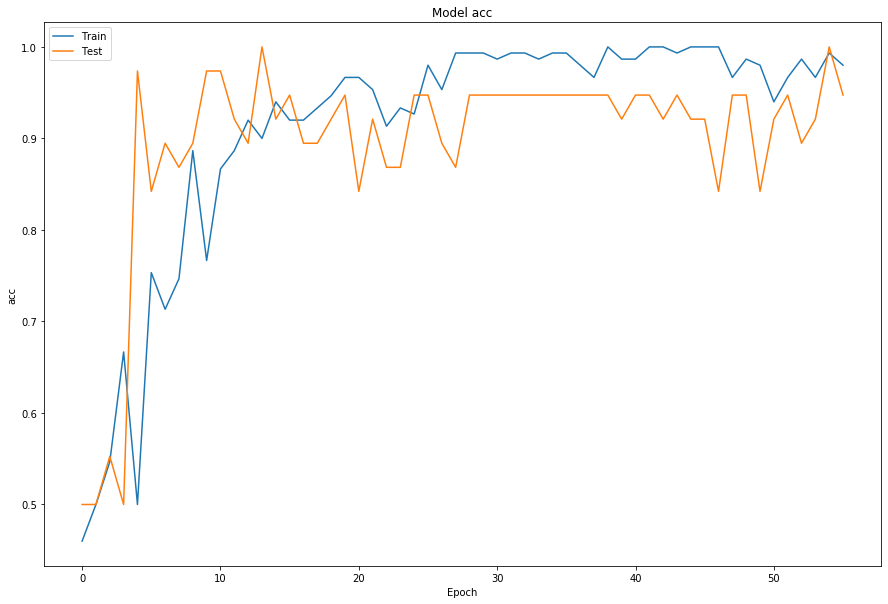

In [27]:
mod_acc=history.history['accuracy']+history1.history['accuracy']+history2.history['accuracy']+history3.history['accuracy']+history4.history['accuracy']+history5.history['accuracy']+history6.history['accuracy']
mod_ValAcc=history.history['val_accuracy']+history1.history['val_accuracy']+history2.history['val_accuracy']+history3.history['val_accuracy']+history4.history['val_accuracy']+history5.history['val_accuracy']+history6.history['val_accuracy']
#Loss
plt.figure(figsize=(15,10))
plt.plot(mod_acc)
plt.plot(mod_ValAcc) 
plt.title('Model acc') 
plt.ylabel('acc') 
plt.xlabel('Epoch') 
plt.legend(['Train', 'Test'], loc='upper left') 
plt.show()

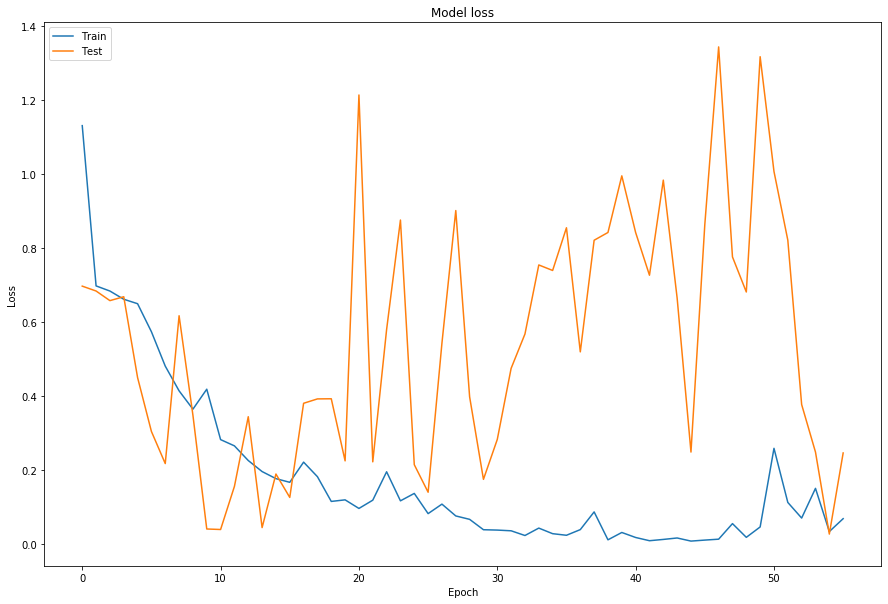

In [28]:
#Loss
mod_loss=history.history['loss']+history1.history['loss']+history2.history['loss']+history3.history['loss']+history4.history['loss']+history5.history['loss']+history6.history['loss']
mod_ValLoss=history.history['val_loss']+history1.history['val_loss']+history2.history['val_loss']+history3.history['val_loss']+history4.history['val_loss']+history5.history['val_loss']+history6.history['val_loss']

plt.figure(figsize=(15,10))
plt.plot(mod_loss)
plt.plot(mod_ValLoss) 
plt.title('Model loss') 
plt.ylabel('Loss') 
plt.xlabel('Epoch') 
plt.legend(['Train', 'Test'], loc='upper left') 
plt.show()